# Chapter 14 - Classifying Images with Deep Convolutional Neural Networks

In [1]:
import numpy as np


def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([
            zero_pad, x_padded, zero_pad
        ])
    res = []
    for i in range(0, int((len(x_padded) - len(w_rot))) + 1, s):
        res.append(np.sum(x_padded[i:i + w_rot.shape[0]] * w_rot))
    return np.array(res)


## Testing:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation:',
       conv1d(x, w, p=2, s=1))

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]


In [2]:
print('NumPy Results:',
      np.convolve(x, w, mode='same'))

NumPy Results: [ 5 14 16 26 24 34 19 22]


# Performing a discrete convolution in 2D

In [3]:
import numpy as np
import scipy.signal


def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1, ::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]: p[0] + X_orig.shape[0],
             p[1]: p[1] + X_orig.shape[1]] = X_orig
    
    res = []
    for i in range(0,
                   int((X_padded.shape[0] - W_rot.shape[0]) / s[0]) + 1, s[0]):
        res.append([])
        for j in range(0,
                       int((X_padded.shape[1] - W_rot.shape[1]) / s[1]) + 1, s[1]):
            X_sub = X_padded[i:i + W_rot.shape[0],
                             j:j + W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
            
    return (np.array(res))
    
    
    
## Testing:
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]


print('Conv2d Implementation:\n',
      conv2d(X, W, p=(1, 1), s=(1, 1)))

print()

print('SciPy Results:\n',
      scipy.signal.convolve2d(X, W, mode='same'))


Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]

SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


In [4]:
import torch
from torchvision.io import read_image

# img = read_image('example-image.png')

# print('Image shape:', img.shape)
# print('Number of channels:', img.shape[0])
# print('Image data type:', img.dtype)
# print(img[:, 100:102, 100:102])

In [5]:
import torch.nn as nn

loss_func = nn.BCELoss()
loss = loss_func(torch.tensor([0.9]), torch.tensor([1.0]))
l2_lambda = 0.001
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=5,
                       kernel_size=5)
l2_penalty = l2_lambda * sum(
        [(p**2).sum() for p in conv_layer.parameters()])

loss_with_penalty = loss + l2_penalty
linear_layer = nn.Linear(10, 16)

l2_penalty = l2_lambda * sum([(p**2).sum() for p in linear_layer.parameters()])
loss_with_penalty = loss + l2_penalty

In [6]:
# optimizer = torch.optim.SGD(
#     model.parameters(),
#     weight_decay=l2_lambda)

In [7]:
####### Binary Cross-entropy

logits = torch.tensor([0.8])
probas = torch.sigmoid(logits)
target = torch.tensor([1.0])
bce_loss_fn = nn.BCELoss()
bce_logits_loss_fn = nn.BCEWithLogitsLoss()

print(f'BCE (w Probas): {bce_loss_fn(probas, target):.4f}')
print(f'BCE (w Logits): {bce_logits_loss_fn(logits, target):.4f}')

BCE (w Probas): 0.3711
BCE (w Logits): 0.3711


In [8]:
####### Categorical Cross-entropy

logits = torch.tensor([[1.5, 0.8, 2.1]])
probas = torch.softmax(logits, dim=1)
target = torch.tensor([2])
cce_loss_fn = nn.NLLLoss()
cce_logits_loss_fn = nn.CrossEntropyLoss()

print(f'CCE (w Probas): {cce_logits_loss_fn(logits, target):.4f}')
print(f'CCE (w Logits): {cce_loss_fn(torch.log(probas), target):.4f}')

CCE (w Probas): 0.5996
CCE (w Logits): 0.5996


# Implementing a deep CNN using PyTorch

In [9]:
import torchvision
from torchvision import transforms

image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root=image_path, train=True,
                                           transform=transform, download=True)

from torch.utils.data import Subset

mnist_valid_dataset = Subset(mnist_dataset,
                             torch.arange(10000))

mnist_train_dataset = Subset(mnist_dataset,
                             torch.arange(
                                 10000, len(mnist_dataset)
                             ))

mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path, train=False,
    transform=transform, download=False)

c:\users\robert\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
from torch.utils.data import DataLoader

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,
                      batch_size,
                      shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset,
                      batch_size,
                      shuffle=False)

# Implementing a CNN using the torch.nn module
# Configuring CNN layers in PyTorch
# Constructing a CNN in PyTorch

In [11]:
model = nn.Sequential()
model.add_module(
    'conv1',
    nn.Conv2d(
        in_channels=1, out_channels=32,
        kernel_size=5, padding=2
    )
)

model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module(
    'conv2',
    nn.Conv2d(
        in_channels=32, out_channels=64,
        kernel_size=5, padding=2
    )
)
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

In [12]:
x = torch.ones((4, 1, 28, 28))
model(x).shape

c:\users\robert\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([4, 64, 7, 7])

In [13]:
model.add_module('flatten', nn.Flatten())
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [14]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024, 10))

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() * y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch]  += is_correct.sum()
            loss_hist_valid[epoch] /= len(valid_dl.dataset)
            accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
            
            print(f'Epoch {epoch + 1} accuracy: '
                  f'{accuracy_hist_train[epoch]:.4f} val_accuracy: '
                  f'{accuracy_hist_valid[epoch]:.4f}')
            
        return loss_hist_train, loss_hist_valid, \
               accuracy_hist_train, accuracy_hist_valid

In [ ]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

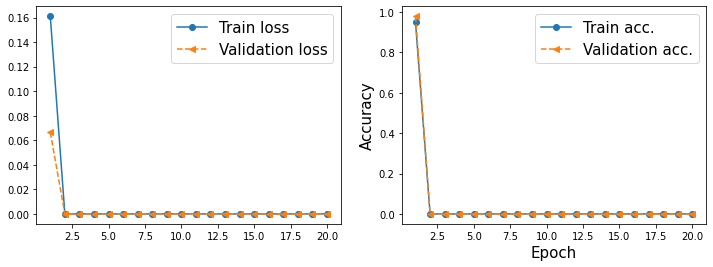

In [20]:
import matplotlib.pyplot as plt

x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')

ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')

ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()
        

In [21]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 225.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()

print(f'Test accuracy: {is_correct.mean():.4f}')

Test accuracy: 0.9849
